# Module Assignment 1
### Name: Jaya Marella

In [1]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in data
unemployment_df = pd.read_csv("Module1/Unemployment in America Per US State.csv")
unemployment_df

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2
...,...,...,...,...,...,...,...,...,...,...,...
29887,51,Virginia,2022,12,"6,862,585","4,470,272",65.1,"4,330,531",63.1,"139,741",3.1
29888,53,Washington,2022,12,"6,254,253","4,015,286",64.2,"3,832,769",61.3,"182,517",4.5
29889,54,West Virginia,2022,12,"1,434,789","784,323",54.7,"752,464",52.4,"31,859",4.1
29890,55,Wisconsin,2022,12,"4,753,700","3,068,610",64.6,"2,976,670",62.6,"91,940",3.0


In [3]:
#fix column names
old_names = unemployment_df.columns
new_names = ['_'.join(c.split()).lower() for c in old_names]
unemployment_df.columns = new_names
unemployment_df.head()

,fips_code,state/area,year,month,total_civilian_non-institutional_population_in_state/area,total_civilian_labor_force_in_state/area,percent_(%)_of_state/area's_population,total_employment_in_state/area,percent_(%)_of_labor_force_employed_in_state/area,total_unemployment_in_state/area,percent_(%)_of_labor_force_unemployed_in_state/area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2


In [4]:
#remove special characters from columns
unemployment_df.rename({'state/area': 'state'}, axis=1, inplace=True)

In [5]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29892 entries, 0 to 29891
Data columns (total 11 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   fips_code                                                  29892 non-null  int64  
 1   state                                                      29892 non-null  object 
 2   year                                                       29892 non-null  int64  
 3   month                                                      29892 non-null  int64  
 4   total_civilian_non-institutional_population_in_state/area  29892 non-null  object 
 5   total_civilian_labor_force_in_state/area                   29892 non-null  object 
 6   percent_(%)_of_state/area's_population                     29892 non-null  float64
 7   total_employment_in_state/area                             29892 non-null  object 
 8   percen

In [6]:
#change appropriate columns to numeric
cols = ['total_civilian_non-institutional_population_in_state/area', 'total_civilian_labor_force_in_state/area','total_employment_in_state/area','total_unemployment_in_state/area' ]

for col in cols:
    unemployment_df[col] = unemployment_df[col].str.replace(',', '').astype(float)


In [7]:
#remove unneccessary columns
#u_df = unemployment_df[['state', 'year', 'month','percent_(%)_of_labor_force_unemployed_in_state/area' ]]
#u_df

In [8]:
#add column for geographic region
#create dictionary
state_regions = {
    'Connecticut': 'New England', 
    'Maine': 'New England',   
    'Massachusetts': 'New England',
    'New Hampshire': 'New England', 
    'Rhode Island':  'New England',
    'Vermont' : 'New England',
    'New Jersey': 'Middle Atlantic',
    'New York': 'Middle Atlantic',
    'Pennsylvania':'Middle Atlantic',
    'Indiana': 'East North Central', 
    'Illinois': 'East North Central', 
    'Michigan': 'East North Central', 
    'Ohio': 'East North Central', 
    'Wisconsin': 'East North Central',
    'Iowa': 'West North Central',     
    'Nebraska': 'West North Central',
    'Kansas': 'West North Central',  
    'North Dakota': 'West North Central', 
    'Minnesota': 'West North Central',        
    'South Dakota': 'West North Central',
    'Missouri': 'West North Central',
    'Delaware': 'South Atlantic', 
    'District of Columbia': 'South Atlantic', 
    'Florida': 'South Atlantic',   
    'Georgia': 'South Atlantic', 
    'Maryland': 'South Atlantic',  
    'North Carolina': 'South Atlantic', 
    'South Carolina':'South Atlantic',   
    'Virginia': 'South Atlantic',   
    'West Virginia': 'South Atlantic',  
    'Alabama': 'East South Central', 
    'Kentucky': 'East South Central', 
    'Mississippi': 'East South Central',  
    'Tennessee': 'East South Central',
    'Arkansas':'West South Central', 
    'Louisiana': 'West South Central', 
    'Oklahoma': 'West South Central', 
    'Texas': 'West South Central',
    'Arizona': 'Mountain',  
    'Colorado': 'Mountain', 
    'Idaho': 'Mountain',  
    'New Mexico': 'Mountain',
    'Montana': 'Mountain', 
    'Utah': 'Mountain',  
    'Nevada': 'Mountain',  
    'Wyoming': 'Mountain',
    'Alaska': 'Pacific',  
    'California': 'Pacific', 
    'Hawaii':'Pacific',  
    'Oregon': 'Pacific',  
    'Washington': 'Pacific' 
    
}

#map region to state
unemployment_df['region'] = unemployment_df['state'].map(state_regions)
unemployment_df

,fips_code,state,year,month,total_civilian_non-institutional_population_in_state/area,total_civilian_labor_force_in_state/area,percent_(%)_of_state/area's_population,total_employment_in_state/area,percent_(%)_of_labor_force_employed_in_state/area,total_unemployment_in_state/area,percent_(%)_of_labor_force_unemployed_in_state/area,region
0,1,Alabama,1976,1,2605000.0,1484555.0,57.0,1386023.0,53.2,98532.0,6.6,East South Central
1,2,Alaska,1976,1,232000.0,160183.0,69.0,148820.0,64.1,11363.0,7.1,Pacific
2,4,Arizona,1976,1,1621000.0,964120.0,59.5,865871.0,53.4,98249.0,10.2,Mountain
3,5,Arkansas,1976,1,1536000.0,889044.0,57.9,824395.0,53.7,64649.0,7.3,West South Central
4,6,California,1976,1,15621000.0,9774280.0,62.6,8875685.0,56.8,898595.0,9.2,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...
29887,51,Virginia,2022,12,6862585.0,4470272.0,65.1,4330531.0,63.1,139741.0,3.1,South Atlantic
29888,53,Washington,2022,12,6254253.0,4015286.0,64.2,3832769.0,61.3,182517.0,4.5,Pacific
29889,54,West Virginia,2022,12,1434789.0,784323.0,54.7,752464.0,52.4,31859.0,4.1,South Atlantic
29890,55,Wisconsin,2022,12,4753700.0,3068610.0,64.6,2976670.0,62.6,91940.0,3.0,East North Central


In [9]:
temp_df = unemployment_df.iloc[:,[1, 2, 10]]
temp_df = temp_df.groupby(['state', 'year'])['percent_(%)_of_labor_force_unemployed_in_state/area'].mean().unstack()
#temp_df = temp_df.groupby(['state', 'year']).mean()

In [10]:
temp_df.head()

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,,,,,,,,,,,,,,
Alabama,6.700000,7.150000,6.408333,7.225000,8.816667,10.691667,13.950000,13.816667,11.283333,9.541667,...,7.325000,6.733333,6.125,5.908333,4.508333,3.941667,3.183333,6.425000,3.366667,2.575000
Alaska,7.566667,9.891667,10.633333,9.058333,9.533333,9.183333,10.058333,10.100000,9.891667,9.841667,...,6.991667,6.741667,6.275,6.600000,6.508333,6.041667,5.591667,8.308333,6.433333,4.025000
Arizona,9.758333,8.400000,5.950000,5.075000,6.608333,6.191667,9.958333,9.108333,4.958333,6.358333,...,7.816667,6.791667,6.075,5.483333,4.975000,4.808333,4.808333,7.841667,5.075000,3.825000
Arkansas,6.916667,6.475000,6.225000,6.283333,7.533333,8.600000,9.466667,9.700000,8.533333,8.491667,...,7.041667,5.900000,4.950,3.983333,3.741667,3.658333,3.491667,6.200000,4.075000,3.300000
California,9.150000,8.391667,7.133333,6.216667,6.900000,7.433333,10.058333,9.825000,7.758333,7.183333,...,9.033333,7.566667,6.225,5.516667,4.833333,4.258333,4.100000,10.200000,7.325000,4.183333


In [11]:
# temp_df.plot(marker='o', figsize=(10, 6))
# plt.xlabel('Year')
# plt.ylabel('Average Unemployment Rate (%)')
# plt.title('Average Unemployment Rate by State Over Time')

# # Add legend
# plt.legend(title='State')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

<Axes: xlabel='year'>

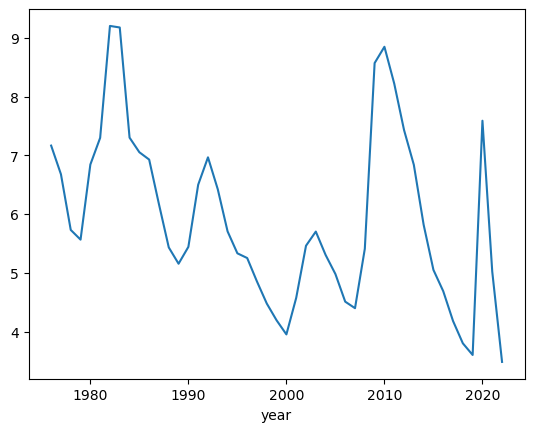

In [12]:
#avg unemployment rate for all 50 states over time (main graph)
temp_df.mean(axis=0).plot()

In [13]:
#region df
region_df = unemployment_df.iloc[:,[1, 2, 10, 11]]
region_df = region_df.groupby(['region',  'state', 'year'])['percent_(%)_of_labor_force_unemployed_in_state/area'].mean().unstack()

In [14]:
region_df

year                                          1976      1977       1978  \
region             state                                                  
East North Central Illinois               6.550000  6.191667   5.983333   
                   Indiana                6.033333  5.766667   5.550000   
                   Michigan               9.400000  8.225000   7.033333   
                   Ohio                   7.725000  6.458333   5.516667   
                   Wisconsin              5.508333  5.058333   4.866667   
East South Central Alabama                6.700000  7.150000   6.408333   
                   Kentucky               5.416667  4.850000   5.050000   
                   Mississippi            6.491667  7.208333   6.750000   
                   Tennessee              6.100000  6.266667   5.841667   
Middle Atlantic    New Jersey            10.383333  9.283333   7.241667   
                   New York              10.208333  9.166667   7.708333   
                   Pennsylvania           8.008333  7.741667   7.008333   
Mountain           Arizona                9.758333  8.400000   5.950000   
                   Colorado               5.916667  6.350000   5.558333   
                   Idaho                  5.650000  5.850000   5.491667   
                   Montana                5.875000  6.150000   5.566667   
                   Nevada                 8.825000  6.766667   4.416667   
                   New Mexico             8.716667  7.733333   6.191667   
                   Utah                   5.608333  5.208333   3.866667   
                   Wyoming                3.858333  3.241667   2.858333   
New England        Connecticut            9.175000  6.991667   5.291667   
                   Maine                  8.650000  8.358333   6.416667   
                   Massachusetts          9.741667  7.866667   6.158333   
                   New Hampshire          6.425000  5.566667   3.816667   
                   Rhode Island           8.008333  8.041667   6.308333   
                   Vermont                8.258333  7.008333   5.658333   
Pacific            Alaska                 7.566667  9.891667  10.633333   
                   California             9.150000  8.391667   7.133333   
                   Hawaii                 9.200000  7.616667   6.941667   
                   Oregon                 9.266667  7.433333   6.116667   
                   Washington             8.783333  8.375000   6.808333   
South Atlantic     Delaware               8.600000  8.183333   7.075000   
                   District of Columbia   8.616667  8.625000   7.791667   
                   Florida                9.300000  8.275000   6.758333   
                   Georgia                8.158333  6.933333   5.691667   
                   Maryland               6.550000  6.108333   5.608333   
                   North Carolina         6.191667  5.891667   4.541667   
                   South Carolina         7.025000  6.733333   5.558333   
                   Virginia               5.866667  5.450000   5.275000   
                   West Virginia          7.225000  6.916667   6.341667   
West North Central Iowa                   4.083333  4.008333   3.841667   
                   Kansas                 4.150000  3.875000   3.041667   
                   Minnesota              5.800000  5.275000   3.908333   
                   Missouri               6.183333  6.016667   4.900000   
                   Nebraska               3.150000  3.366667   2.966667   
                   North Dakota           3.758333  4.441667   4.133333   
                   South Dakota           3.316667  3.375000   3.158333   
West South Central Arkansas               6.916667  6.475000   6.225000   
                   Louisiana              6.641667  6.933333   6.800000   
                   Oklahoma               5.583333  4.766667   3.316667   
                   Texas                  5.816667  5.433333   4.866667   

year                    

In [34]:
#split region_df into multiple dfs and create graph for each one
#East North Central
enc_df = region_df.loc['East North Central']
enc_df

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,,,,,,,,,,,,,,
Illinois,6.550000,6.191667,5.983333,5.583333,8.216667,8.625000,11.400000,11.708333,9.133333,9.058333,...,9.075000,7.166667,5.991667,5.883333,4.950000,4.400000,3.966667,9.333333,6.091667,4.541667
Indiana,6.033333,5.766667,5.550000,6.433333,9.716667,9.700000,11.983333,11.100000,8.466667,7.675000,...,7.500000,5.950000,4.783333,4.366667,3.491667,3.433333,3.291667,7.341667,3.891667,2.991667
Michigan,9.400000,8.225000,7.033333,7.866667,12.300000,12.375000,15.458333,14.483333,11.233333,10.000000,...,8.725000,7.233333,5.425000,5.008333,4.575000,4.158333,4.066667,10.000000,5.850000,4.208333
Ohio,7.725000,6.458333,5.516667,5.866667,8.316667,9.566667,12.575000,12.350000,9.466667,8.916667,...,7.458333,5.800000,4.950000,5.075000,4.966667,4.500000,4.183333,8.291667,5.133333,4.025000
Wisconsin,5.508333,5.058333,4.866667,4.533333,7.366667,7.816667,10.316667,9.766667,7.283333,7.125000,...,6.641667,5.350000,4.425000,3.908333,3.258333,2.975000,3.166667,6.391667,3.841667,2.933333


<Axes: title={'center': 'East North Central'}, xlabel='Year', ylabel='Average Percent of Labor Force Unemployed'>

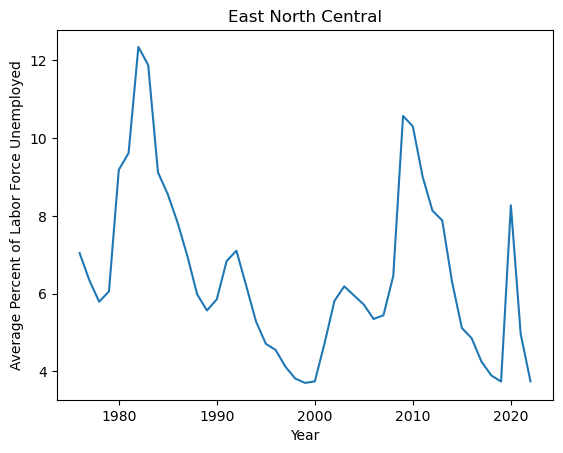

In [41]:
#East North Central plot
enc_df.mean(axis=0).plot(title='East North Central', xlabel='Year', ylabel='Average Percent of Labor Force Unemployed')

In [22]:
#East South Central 
esc_df = region_df.loc['East South Central']
esc_df

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,,,,,,,,,,,,,,
Alabama,6.700000,7.150000,6.408333,7.225000,8.816667,10.691667,13.950000,13.816667,11.283333,9.541667,...,7.325000,6.733333,6.125000,5.908333,4.508333,3.941667,3.183333,6.425000,3.366667,2.575000
Kentucky,5.416667,4.850000,5.050000,5.533333,8.000000,8.591667,10.825000,11.266667,9.066667,9.000000,...,7.916667,6.416667,5.233333,5.033333,4.775000,4.200000,4.100000,6.450000,4.425000,3.908333
Mississippi,6.491667,7.208333,6.750000,5.733333,7.400000,8.516667,11.008333,11.966667,10.616667,10.433333,...,8.491667,7.591667,6.483333,5.966667,5.233333,4.958333,5.525000,8.050000,5.500000,3.908333
Tennessee,6.100000,6.266667,5.841667,5.858333,7.225000,8.900000,11.675000,11.650000,8.841667,7.916667,...,7.725000,6.600000,5.566667,4.758333,3.750000,3.500000,3.341667,7.533333,4.491667,3.366667


<Axes: title={'center': 'Average % Unemployment per Year for East South Central'}, xlabel='Year', ylabel='Average Percent of Labor Force Unemployed'>

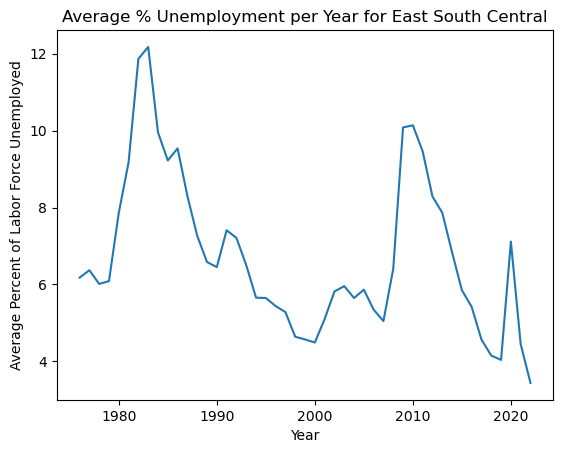

In [43]:
#East South Central plot
esc_df.mean(axis=0).plot(title='Average % Unemployment per Year for East South Central', xlabel='Year', ylabel='Average Percent of Labor Force Unemployed')

In [27]:
#Middle Atlantic
ma_df = region_df.loc['Middle Atlantic']
ma_df

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,,,,,,,,,,,,,,
New Jersey,10.383333,9.283333,7.241667,6.866667,7.175000,7.525000,8.708333,8.191667,6.266667,5.608333,...,8.375000,6.733333,5.700000,4.941667,4.533333,4.008333,3.450,9.450000,6.608333,3.666667
New York,10.208333,9.166667,7.708333,7.100000,7.433333,7.558333,8.700000,8.883333,7.225000,6.600000,...,7.791667,6.291667,5.233333,4.875000,4.633333,4.100000,3.850,9.850000,7.016667,4.250000
Pennsylvania,8.008333,7.741667,7.008333,6.975000,8.141667,8.366667,10.900000,11.108333,8.933333,8.000000,...,7.100000,5.933333,5.391667,5.341667,4.975000,4.416667,4.325,8.916667,6.033333,4.350000


<Axes: title={'center': 'Average Unemployment per Year for Middle Atlantic'}, xlabel='Year', ylabel='Average Percent of Labor Force Unemployed'>

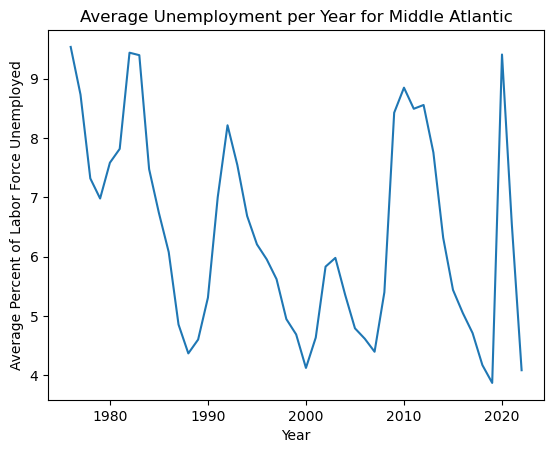

In [45]:
#Middle Atlantic plot
ma_df.mean(axis=0).plot(title='Average Unemployment per Year for Middle Atlantic', xlabel='Year', ylabel='Average Percent of Labor Force Unemployed')

In [28]:
#Mountain
m_df = region_df.loc['Mountain']
m_df

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,,,,,,,,,,,,,,
Arizona,9.758333,8.400000,5.950000,5.075000,6.608333,6.191667,9.958333,9.108333,4.958333,6.358333,...,7.816667,6.791667,6.075000,5.483333,4.975000,4.808333,4.808333,7.841667,5.075000,3.825000
Colorado,5.916667,6.350000,5.558333,4.616667,5.883333,5.641667,7.608333,7.116667,5.491667,5.983333,...,6.750000,4.983333,3.741667,3.133333,2.608333,3.050000,2.666667,6.766667,5.458333,3.016667
Idaho,5.650000,5.850000,5.491667,5.825000,7.550000,7.650000,9.883333,9.075000,7.200000,7.808333,...,6.816667,4.383333,3.866667,3.675000,3.216667,2.875000,2.875000,5.516667,3.500000,2.675000
Montana,5.875000,6.150000,5.566667,5.208333,6.316667,6.725000,8.608333,8.741667,7.508333,7.666667,...,5.341667,4.666667,4.291667,4.325000,4.091667,3.750000,3.500000,5.841667,3.383333,2.633333
Nevada,8.825000,6.766667,4.416667,4.866667,6.316667,7.316667,10.050000,9.841667,7.658333,7.475000,...,9.966667,8.158333,6.850000,5.808333,4.983333,4.383333,4.108333,13.700000,6.941667,5.358333
New Mexico,8.716667,7.733333,6.191667,6.666667,7.608333,7.225000,9.033333,9.708333,7.716667,8.575000,...,6.908333,6.591667,6.600000,6.750000,6.041667,4.925000,4.958333,7.925000,7.058333,4.025000
Utah,5.608333,5.208333,3.866667,4.400000,6.275000,6.650000,8.108333,9.016667,6.566667,6.050000,...,4.208333,3.633333,3.508333,3.350000,3.166667,2.916667,2.541667,4.850000,2.758333,2.300000
Wyoming,3.858333,3.241667,2.858333,2.533333,3.825000,4.150000,5.966667,7.958333,6.308333,7.016667,...,4.733333,4.341667,4.208333,5.333333,4.325000,4.058333,3.716667,5.900000,4.625000,3.566667


<Axes: title={'center': 'Average % Unemployment per Year for Mountain Region'}, xlabel='Year', ylabel='Average Percent of Labor Force Unemployed'>

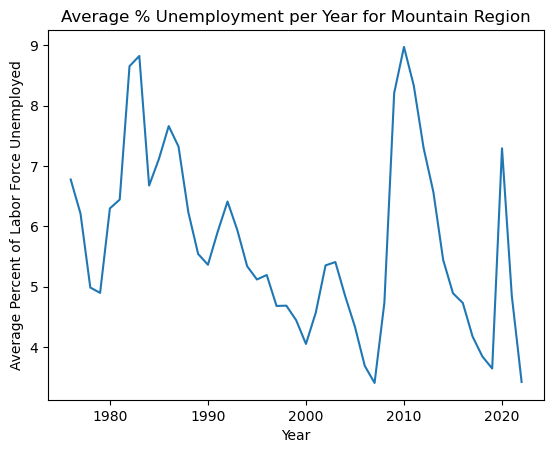

In [44]:
#Mountain plot
m_df.mean(axis=0).plot(title='Average % Unemployment per Year for Mountain Region', xlabel='Year', ylabel='Average Percent of Labor Force Unemployed')

In [29]:
#New England
ne_df = region_df.loc['New England']
ne_df

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,,,,,,,,,,,,,,
Connecticut,9.175000,6.991667,5.291667,5.083333,5.666667,6.200000,6.858333,6.008333,4.650000,4.391667,...,7.950000,6.616667,5.616667,4.866667,4.416667,3.883333,3.608333,7.966667,6.291667,4.158333
Maine,8.650000,8.358333,6.416667,6.625000,7.475000,7.241667,8.583333,8.283333,6.125000,5.558333,...,6.683333,5.558333,4.383333,3.775000,3.358333,3.175000,2.941667,5.116667,4.616667,2.941667
Massachusetts,9.741667,7.866667,6.158333,5.483333,5.766667,6.391667,7.791667,6.933333,4.775000,4.150000,...,6.641667,5.741667,4.791667,4.041667,3.791667,3.475000,3.016667,9.425000,5.525000,3.766667
New Hampshire,6.425000,5.566667,3.816667,3.133333,4.508333,5.058333,6.866667,5.500000,4.200000,3.658333,...,5.250000,4.325000,3.391667,2.883333,2.808333,2.625000,2.566667,6.716667,3.400000,2.500000
Rhode Island,8.008333,8.041667,6.308333,6.316667,7.241667,7.558333,9.991667,8.458333,5.316667,4.658333,...,9.475000,7.766667,6.025000,5.241667,4.508333,4.033333,3.550000,9.208333,5.508333,3.216667
Vermont,8.258333,7.008333,5.658333,4.983333,5.933333,5.850000,6.850000,6.541667,4.916667,4.583333,...,4.416667,3.991667,3.533333,3.125000,3.008333,2.483333,2.100000,5.716667,3.700000,2.625000


<Axes: title={'center': 'Average % Unemployment per Year for New England'}, xlabel='Year', ylabel='Average Percent of Labor Force Unemployed'>

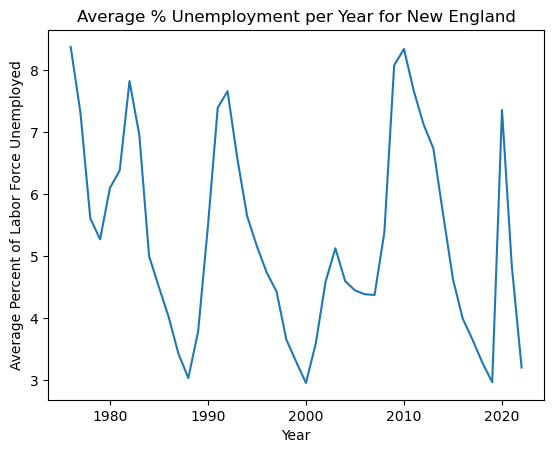

In [46]:
#New England plot
ne_df.mean(axis=0).plot(title='Average % Unemployment per Year for New England', xlabel='Year', ylabel='Average Percent of Labor Force Unemployed')

In [30]:
#Pacific
p_df = region_df.loc['Pacific']
p_df

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,,,,,,,,,,,,,,
Alaska,7.566667,9.891667,10.633333,9.058333,9.533333,9.183333,10.058333,10.100000,9.891667,9.841667,...,6.991667,6.741667,6.275000,6.600000,6.508333,6.041667,5.591667,8.308333,6.433333,4.025000
California,9.150000,8.391667,7.133333,6.216667,6.900000,7.433333,10.058333,9.825000,7.758333,7.183333,...,9.033333,7.566667,6.225000,5.516667,4.833333,4.258333,4.100000,10.200000,7.325000,4.183333
Hawaii,9.200000,7.616667,6.941667,5.725000,4.975000,5.175000,6.116667,5.900000,5.450000,5.225000,...,4.758333,4.233333,3.416667,2.891667,2.216667,2.408333,2.516667,11.858333,6.016667,3.475000
Oregon,9.266667,7.433333,6.116667,6.725000,8.416667,9.700000,11.358333,10.833333,9.300000,8.658333,...,7.750000,6.641667,5.466667,4.750000,4.058333,4.041667,3.725000,7.616667,5.208333,4.133333
Washington,8.783333,8.375000,6.808333,6.791667,7.925000,9.325000,11.633333,11.200000,9.316667,8.241667,...,6.633333,5.925000,5.433333,5.225000,4.641667,4.425000,4.233333,8.450000,5.208333,4.175000


<Axes: title={'center': 'Average % Unemployment per Year for Pacific Region'}, xlabel='Year', ylabel='Average Percent of Labor Force Unemployed'>

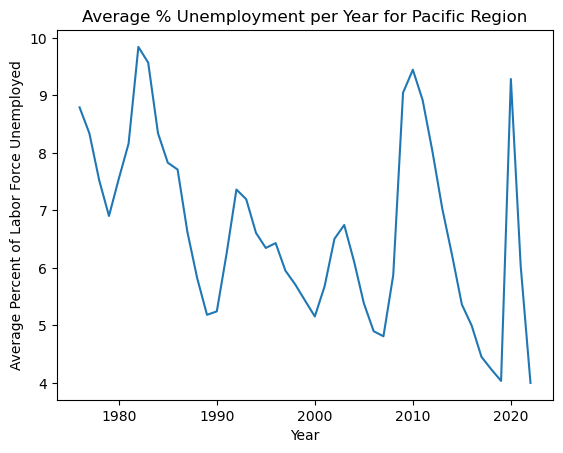

In [47]:
#Pacific plot
p_df.mean(axis=0).plot(title='Average % Unemployment per Year for Pacific Region', xlabel='Year', ylabel='Average Percent of Labor Force Unemployed')

In [31]:
#South Atlantic
sa_df = region_df.loc['South Atlantic']
sa_df

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,,,,,,,,,,,,,,
Delaware,8.600000,8.183333,7.075000,6.975000,7.516667,7.783333,8.358333,7.900000,6.216667,5.150000,...,6.608333,5.608333,4.791667,4.525000,4.466667,3.708333,3.591667,7.508333,5.500000,4.491667
District of Columbia,8.616667,8.625000,7.791667,6.841667,7.433333,8.683333,10.341667,10.900000,8.883333,7.966667,...,8.433333,7.708333,6.916667,6.233333,6.100000,5.683333,5.475000,7.883333,6.833333,4.616667
Florida,9.300000,8.275000,6.758333,5.991667,5.983333,6.800000,8.483333,8.641667,6.591667,6.075000,...,7.533333,6.433333,5.525000,4.916667,4.300000,3.650000,3.250000,8.175000,4.658333,2.900000
Georgia,8.158333,6.933333,5.691667,5.133333,6.308333,6.450000,7.800000,7.641667,6.100000,6.341667,...,8.141667,7.141667,6.075000,5.466667,4.758333,4.000000,3.575000,6.483333,3.916667,3.033333
Maryland,6.550000,6.108333,5.608333,5.775000,6.600000,7.083333,8.258333,6.933333,5.341667,4.625000,...,6.516667,5.733333,4.991667,4.291667,4.000000,3.816667,3.391667,6.516667,5.316667,3.233333
North Carolina,6.191667,5.891667,4.541667,4.833333,6.425000,6.425000,9.241667,8.883333,6.575000,5.650000,...,7.733333,6.108333,5.658333,5.100000,4.525000,3.991667,3.866667,7.275000,4.875000,3.641667
South Carolina,7.025000,6.733333,5.558333,4.983333,6.725000,8.150000,10.775000,9.891667,6.950000,6.800000,...,7.425000,6.275000,5.900000,4.916667,4.200000,3.375000,2.783333,5.983333,3.983333,3.258333
Virginia,5.866667,5.450000,5.275000,4.725000,5.108333,5.941667,7.408333,6.350000,5.066667,5.408333,...,5.550000,5.116667,4.366667,4.000000,3.666667,3.008333,2.758333,6.508333,3.883333,2.833333
West Virginia,7.225000,6.916667,6.341667,7.325000,10.133333,10.591667,14.041667,17.233333,14.091667,13.150000,...,6.716667,6.500000,6.583333,6.091667,5.208333,5.166667,4.933333,8.275000,5.108333,3.916667


<Axes: title={'center': 'Average % Unemployment per Year for South Atlantic'}, xlabel='Year', ylabel='Average Percent of Labor Force Unemployed'>

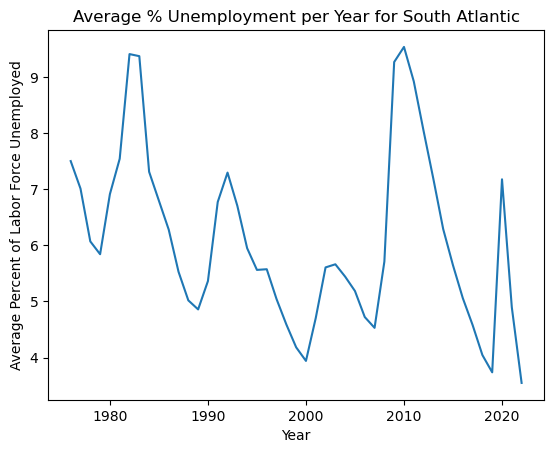

In [48]:
#South Atlantic plot
sa_df.mean(axis=0).plot(title='Average % Unemployment per Year for South Atlantic', xlabel='Year', ylabel='Average Percent of Labor Force Unemployed')

In [32]:
#West North Central
wnc_df = region_df.loc['West North Central']
wnc_df

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,,,,,,,,,,,,,,
Iowa,4.083333,4.008333,3.841667,4.175000,5.933333,6.516667,8.400000,8.233333,7.025000,7.375000,...,4.725000,4.225000,3.691667,3.575000,3.058333,2.575000,2.666667,5.200000,3.816667,2.741667
Kansas,4.150000,3.875000,3.041667,3.108333,4.400000,4.325000,6.300000,5.891667,4.983333,5.133333,...,5.300000,4.508333,4.150000,4.016667,3.616667,3.358333,3.275000,5.850000,3.308333,2.666667
Minnesota,5.800000,5.275000,3.908333,4.325000,5.758333,5.758333,7.925000,7.925000,6.291667,6.025000,...,5.041667,4.266667,3.791667,3.875000,3.483333,3.025000,3.250000,6.266667,3.783333,2.666667
Missouri,6.183333,6.016667,4.900000,4.791667,7.183333,7.708333,9.266667,9.958333,7.375000,6.616667,...,6.775000,6.150000,5.108333,4.550000,3.741667,3.241667,3.208333,6.191667,4.083333,2.491667
Nebraska,3.150000,3.366667,2.966667,2.850000,3.808333,4.125000,5.500000,5.566667,4.491667,5.050000,...,3.675000,3.250000,2.983333,3.066667,2.975000,2.925000,3.125000,4.308333,2.691667,2.341667
North Dakota,3.758333,4.441667,4.133333,4.183333,4.891667,4.925000,5.591667,5.875000,5.350000,5.458333,...,2.891667,2.616667,2.783333,3.100000,2.608333,2.408333,2.166667,4.991667,3.066667,2.083333
South Dakota,3.316667,3.375000,3.158333,3.358333,4.716667,4.808333,5.425000,5.208333,4.366667,4.825000,...,3.700000,3.333333,3.050000,3.016667,3.050000,2.791667,2.783333,4.225000,2.641667,2.066667


<Axes: title={'center': 'Average % Unemployment per Year for West North Central'}, xlabel='Year', ylabel='Average Percent of Labor Force Unemployed'>

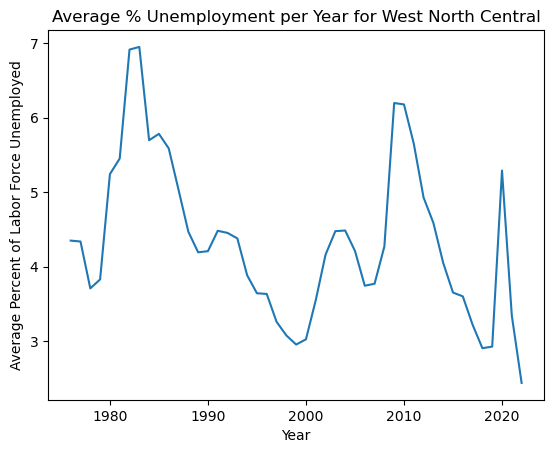

In [49]:
#West North Central plot
wnc_df.mean(axis=0).plot(title='Average % Unemployment per Year for West North Central', xlabel='Year', ylabel='Average Percent of Labor Force Unemployed')

In [33]:
#West South Central
wsc_df = region_df.loc['West South Central']
wsc_df

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
state,,,,,,,,,,,,,,,,,,,,,
Arkansas,6.916667,6.475000,6.225000,6.283333,7.533333,8.600000,9.466667,9.700000,8.533333,8.491667,...,7.041667,5.900000,4.950000,3.983333,3.741667,3.658333,3.491667,6.200000,4.075000,3.300
Louisiana,6.641667,6.933333,6.800000,6.650000,7.050000,8.441667,10.216667,11.550000,10.208333,11.441667,...,6.416667,6.250000,6.291667,6.066667,5.108333,4.825000,4.616667,8.666667,5.600000,3.625
Oklahoma,5.583333,4.766667,3.316667,3.091667,4.125000,3.566667,6.075000,8.108333,6.791667,7.083333,...,5.116667,4.333333,4.291667,4.658333,4.033333,3.291667,3.133333,6.316667,4.016667,3.025
Texas,5.816667,5.433333,4.866667,4.416667,5.250000,5.350000,6.900000,8.058333,6.158333,7.025000,...,6.300000,5.191667,4.483333,4.650000,4.341667,3.900000,3.525000,7.725000,5.650000,3.875


<Axes: title={'center': 'Average % Unemployment per Year for West South Central'}, xlabel='Year', ylabel='Average Percent of Labor Force Unemployed'>

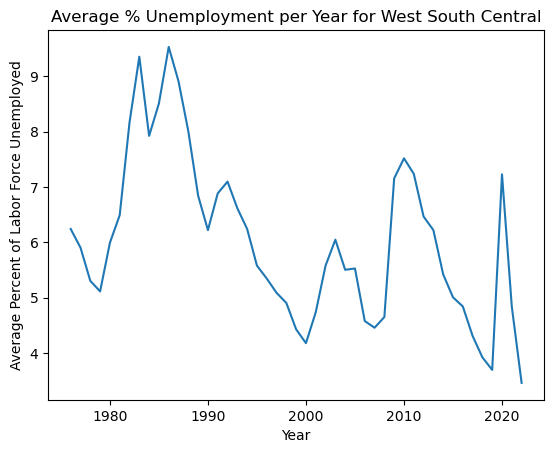

In [50]:
#West South Central plot
wsc_df.mean(axis=0).plot(title='Average % Unemployment per Year for West South Central', xlabel='Year', ylabel='Average Percent of Labor Force Unemployed')

In [15]:
#plot 6 graphs for each region and compare to main graph

/var/folders/w4/vx5c3k5j6zq3d8p2t34cndxm0000gn/T/ipykernel_23705/467720894.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


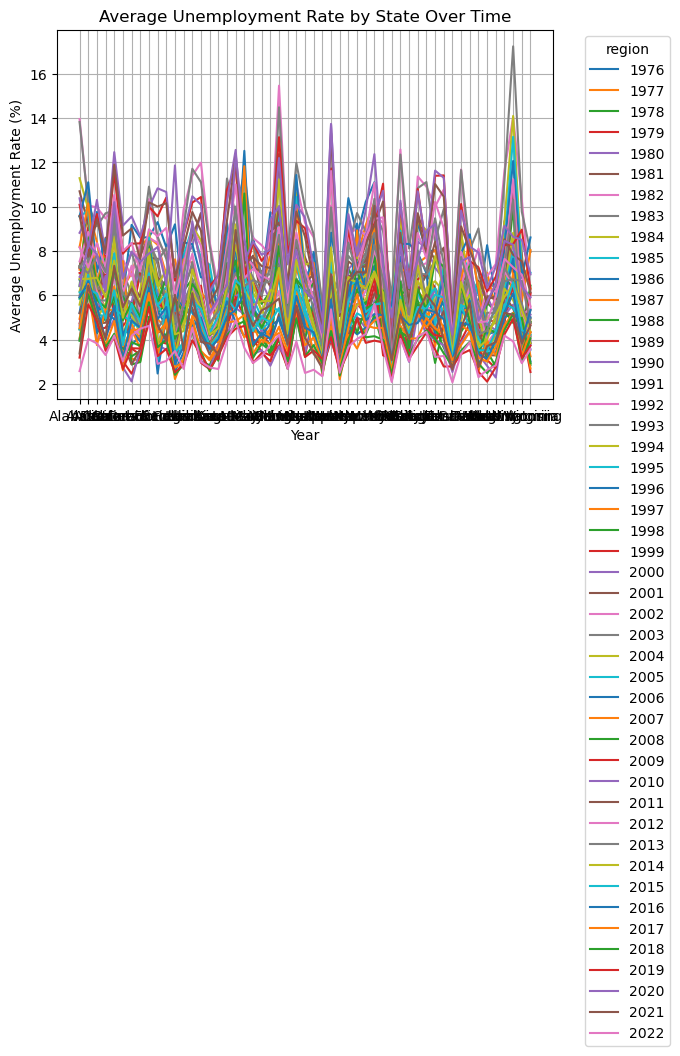

In [17]:
for region in region_df.columns:
    plt.plot(temp_df.index, temp_df[region], label=region)
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate by State Over Time')

# Add legend
plt.legend(title='region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
    

<Axes: xlabel='year'>

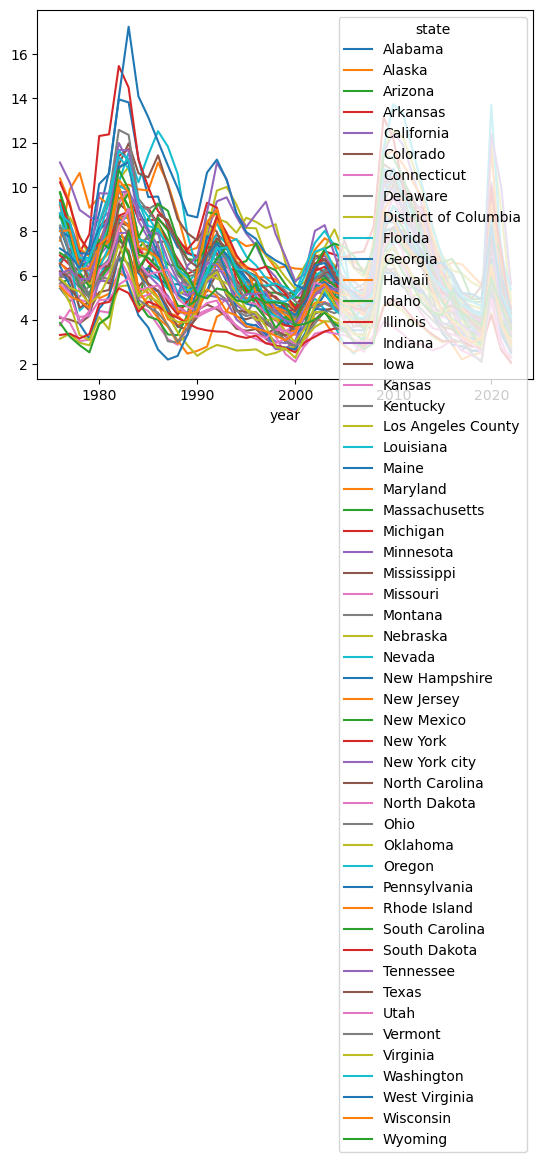

In [18]:
temp_df.T.plot()

In [ ]:
#find census data for each region in the US and create column (can use dictionary to assign region to each state)
#plot 6 graphs for each region and compare to main graph

In [ ]:
#determine area with highest unemployment rate

### data cleaning plan:
* remove special characters from column names
* split into multiple tables?
* remove rows with null values

### potential data analyses
* track how unemployment rates have changed from 2019-2022 (COVID considerations)
* see how its changed since 1976 (would have to average rate of all the months for each state)
